In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

## 2.3.1 예제에 사용할 데이터셋

In [74]:
X, y = mglearn.datasets.make_forge()

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [75]:
X.shape

(26, 2)

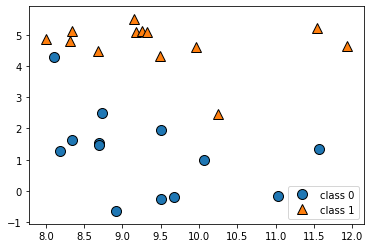

In [76]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['class 0', 'class 1'])

Text(0, 0.5, 'target')

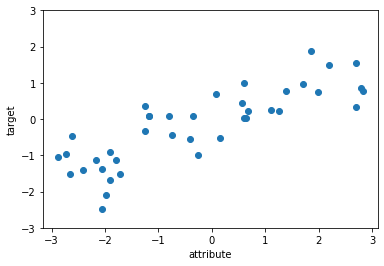

In [77]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('attribute')
plt.ylabel('target')

In [78]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [79]:
cancer.data.shape

(569, 30)

In [80]:
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

In [81]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [82]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [83]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

## 2.3.2 k-최근접 이웃

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


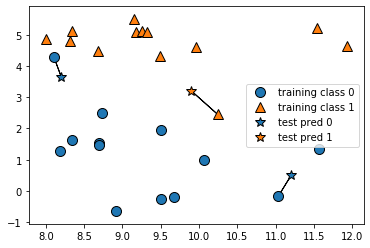

In [84]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


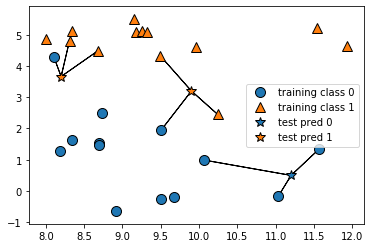

In [85]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [86]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [88]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [89]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [90]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [91]:
clf.score(X_test, y_test)

0.8571428571428571

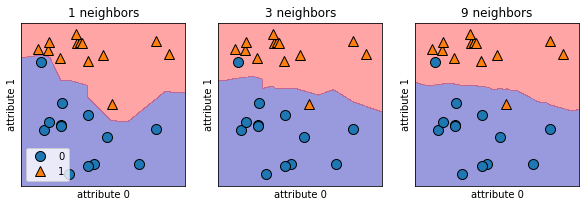

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("attribute 0")
    ax.set_ylabel("attribute 1")
axes[0].legend(loc=3)

In [93]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

In [95]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

In [96]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

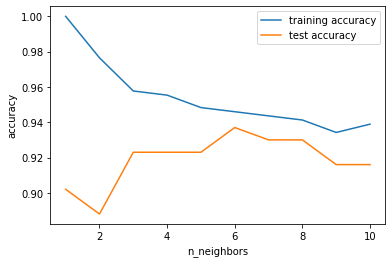

In [97]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

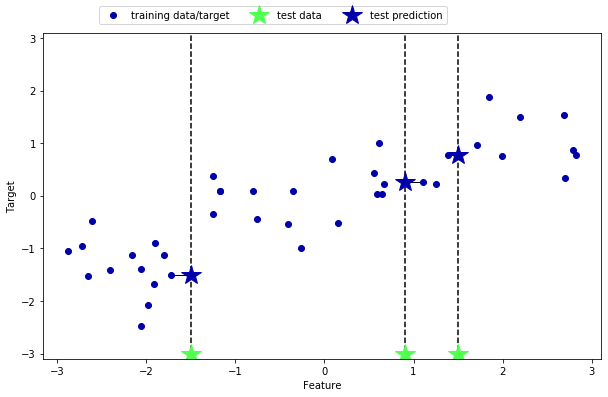

In [98]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

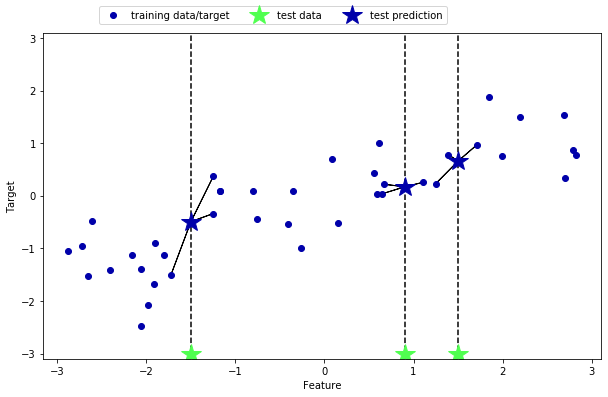

In [99]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [102]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [103]:
reg.score(X_test, y_test)

0.8344172446249604

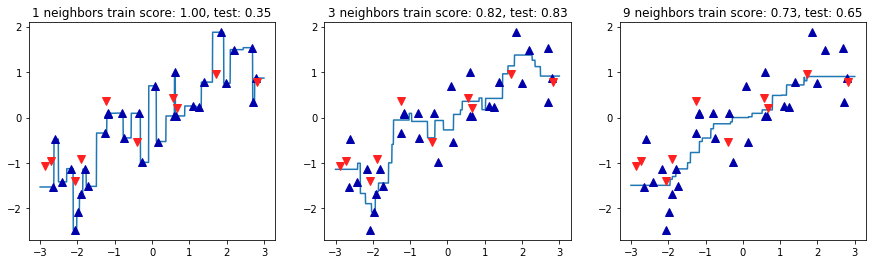

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbors train score: {:.2f}, test: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))

## 2.3.3 선형 모델

w[0]: 0.393906  b: -0.031804


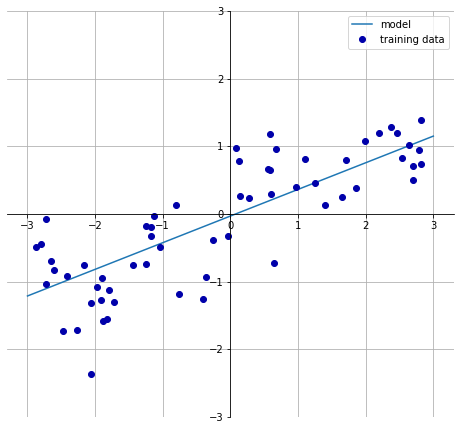

In [105]:
mglearn.plots.plot_linear_regression_wave()

### 선형회귀(최소제곱법)

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [108]:
lr = LinearRegression().fit(X_train, y_train)

In [109]:
lr.coef_

array([0.39390555])

In [110]:
lr.intercept_

-0.031804343026759746

In [111]:
lr.score(X_train, y_train)

0.6700890315075756

In [112]:
lr.score(X_test, y_test)

0.65933685968637

In [113]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [114]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9520519609032728, 0.607472195966602)

### 리지 회귀

In [115]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8857966585170941, 0.7527683481744752)

In [116]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train), ridge10.score(X_test, y_test)

(0.7882787115369614, 0.6359411489177309)

In [117]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge01.score(X_train, y_train), ridge01.score(X_test, y_test)

(0.9282273685001992, 0.7722067936479817)

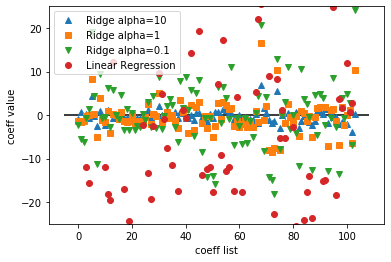

In [118]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Linear Regression")

plt.xlabel("coeff list")
plt.ylabel("coeff value")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-25, 25)
plt.legend()


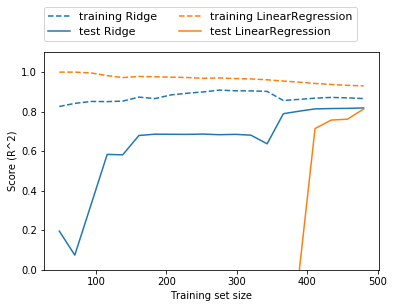

In [119]:
mglearn.plots.plot_ridge_n_samples()

### 라소 

In [120]:
from sklearn.linear_model import Lasso 

In [121]:
lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test), np.sum(lasso.coef_ != 0)

(0.29323768991114607, 0.20937503255272294, 4)

In [122]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [123]:
lasso001.score(X_train, y_train), lasso001.score(X_test, y_test), np.sum(lasso001.coef_ != 0)

(0.8962226511086497, 0.7656571174549982, 33)

In [124]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso00001.score(X_train, y_train), lasso00001.score(X_test, y_test), np.sum(lasso00001.coef_ != 0)

(0.9507158754515463, 0.6437467421272821, 96)

(-25, 25)

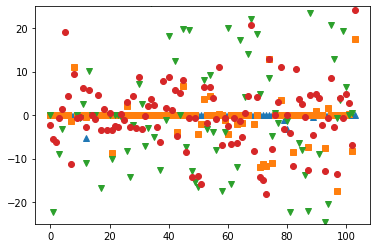

In [125]:
plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25)

### 분류용 선형 모델 

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


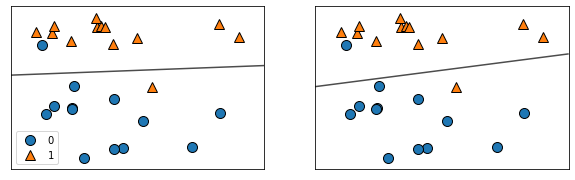

In [127]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
axes[0].legend()


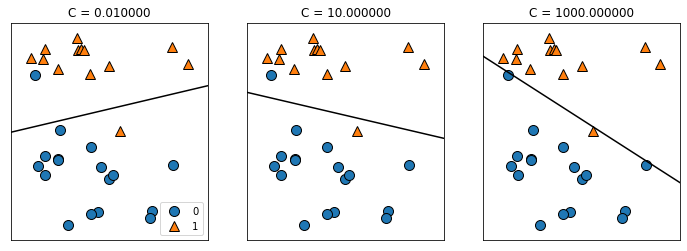

In [128]:
mglearn.plots.plot_linear_svc_regularization()

In [129]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [130]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9553990610328639, 0.958041958041958)

In [131]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg100.score(X_train, y_train), logreg100.score(X_test, y_test)

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9671361502347418, 0.965034965034965)

In [132]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg001.score(X_train, y_train), logreg001.score(X_test, y_test)

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.9342723004694836, 0.9300699300699301)

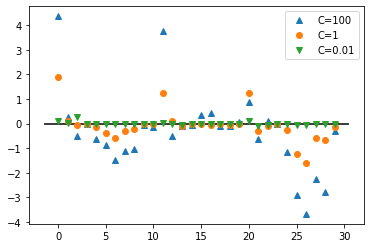

In [133]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.legend()
# plt.xticks

/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tyson/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001, traing accuracy: 0.91
C=0.001, test accuracy: 0.92
C=1.000, traing accuracy: 0.96
C=1.000, test accuracy: 0.96
C=100.000, traing accuracy: 0.99
C=100.000, test accuracy: 0.98


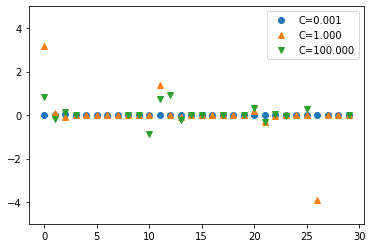

In [134]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}, traing accuracy: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}, test accuracy: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.ylim(-5, 5)
plt.legend()
    

### 다중 클래스 분류용 선형 모델 

In [135]:
from sklearn.datasets import make_blobs

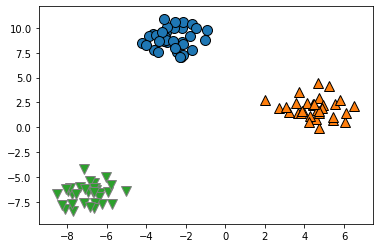

In [136]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [137]:
linear_svm = LinearSVC().fit(X, y)
linear_svm.coef_.shape, linear_svm.intercept_.shape

((3, 2), (3,))

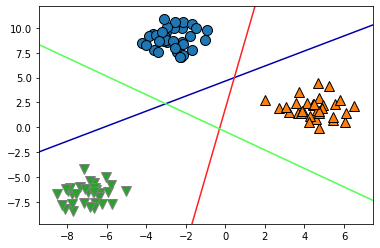

In [138]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-10, 10)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

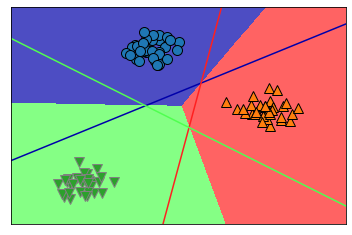

In [139]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

In [140]:
line

array([-15.        , -14.3877551 , -13.7755102 , -13.16326531,
       -12.55102041, -11.93877551, -11.32653061, -10.71428571,
       -10.10204082,  -9.48979592,  -8.87755102,  -8.26530612,
        -7.65306122,  -7.04081633,  -6.42857143,  -5.81632653,
        -5.20408163,  -4.59183673,  -3.97959184,  -3.36734694,
        -2.75510204,  -2.14285714,  -1.53061224,  -0.91836735,
        -0.30612245,   0.30612245,   0.91836735,   1.53061224,
         2.14285714,   2.75510204,   3.36734694,   3.97959184,
         4.59183673,   5.20408163,   5.81632653,   6.42857143,
         7.04081633,   7.65306122,   8.26530612,   8.87755102,
         9.48979592,  10.10204082,  10.71428571,  11.32653061,
        11.93877551,  12.55102041,  13.16326531,  13.7755102 ,
        14.3877551 ,  15.        ])

### 2.3.4 나이브 베이즈 분류기 

In [141]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [142]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
counts

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}

### 2.3.5 결정트리

ExecutableNotFound: failed to execute ['dot', '-Tpng', '-O', 'tmp'], make sure the Graphviz executables are on your systems' PATH

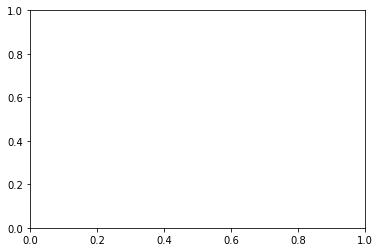

In [143]:
mglearn.plots.plot_animal_tree()

In [ ]:
import graphviz

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
cancer = load_breast_cancer()

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [147]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [148]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.9370629370629371)

In [149]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [150]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=["bad", "good"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [151]:
import graphviz

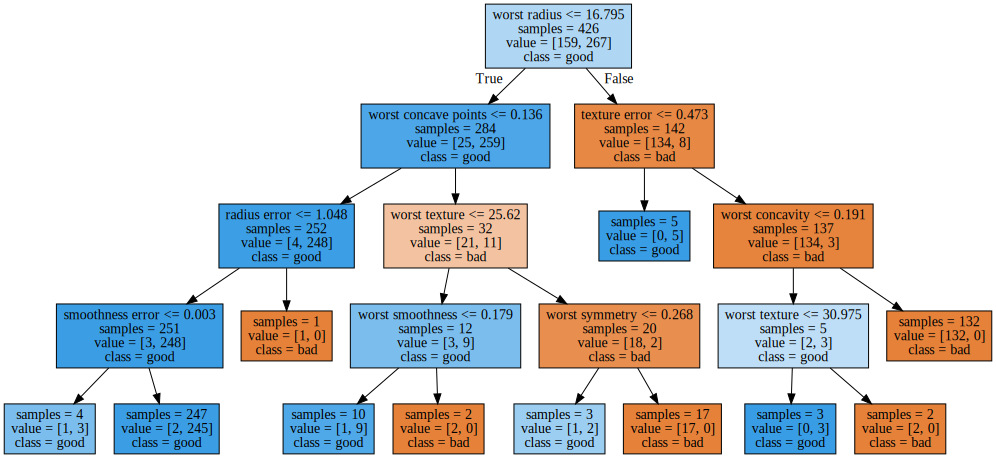

In [152]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 트리의 특성 중요도

In [154]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

30


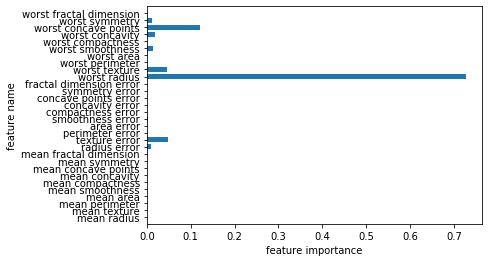

In [162]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature name")
    plt.ylim(-1, n_features)
    print(n_features)
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


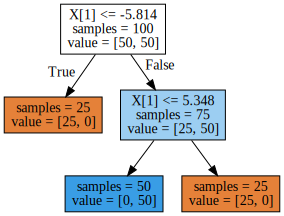

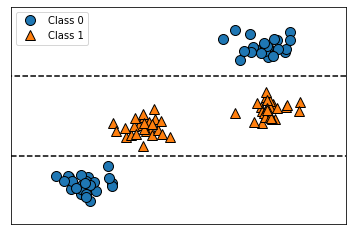

In [164]:
tree = mglearn.plots.plot_tree_not_monotone()
tree

In [165]:
import os

In [168]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

Text(0, 0.5, 'price ($/MByte)')

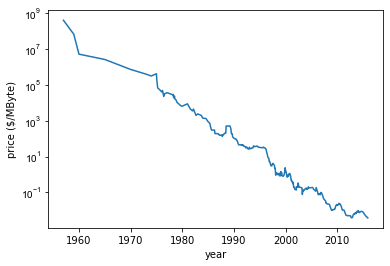

In [170]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/MByte)")

In [171]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [175]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

In [176]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

In [177]:
X_all = ram_prices.date[:, np.newaxis]

In [178]:
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [179]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

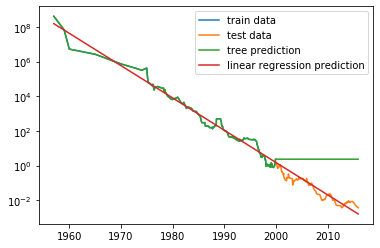

In [185]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="linear regression prediction")
plt.legend()

### 2.3.6 결정 트리의 앙상블

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [188]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [190]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

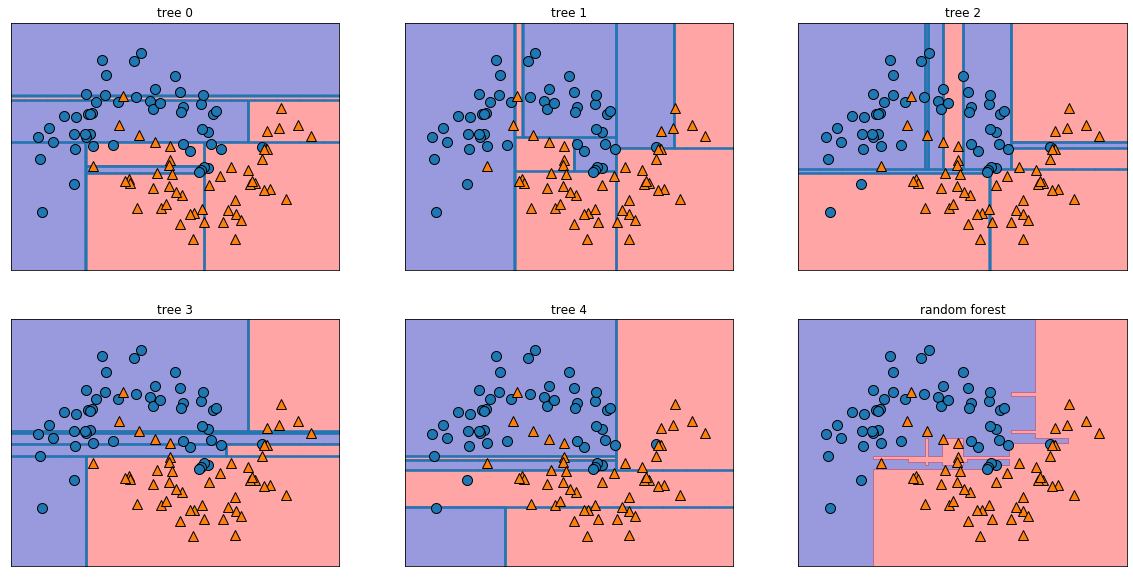

In [191]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.972027972027972)

30


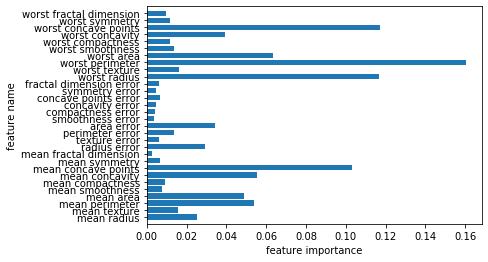

In [195]:
plot_feature_importances_cancer(forest)

In [196]:
from sklearn.ensemble import GradientBoostingClassifier

In [197]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

In [198]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(1.0, 0.965034965034965)

In [202]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [200]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9882629107981221, 0.965034965034965)

30


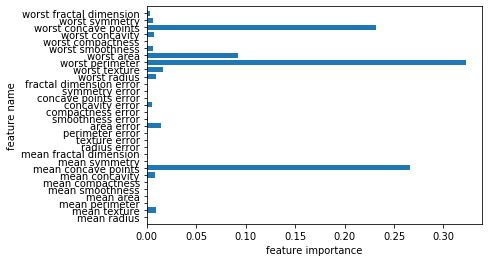

In [203]:
plot_feature_importances_cancer(gbrt)

### 2.3.7 배깅, 엑스트라 트리, 에이다부스트